# Regresión con MLP en el dataset Boston Housing
Este experimento compara distintas configuraciones de redes neuronales y funciones de pérdida para predecir el precio de viviendas en el área de Boston. Incluye comparación entre `MAE` y `MSE`, evaluación con `R²`, análisis de overfitting y exploración de arquitecturas.

## 1. Preparación del dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2. Comparación entre funciones de pérdida: MAE vs MSE

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_model(loss_fn):
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.01), loss=loss_fn, metrics=['mae'])
    return model

model_mse = build_model('mse')
history_mse = model_mse.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

model_mae = build_model('mae')
history_mae = model_mae.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

## 3. Análisis de overfitting

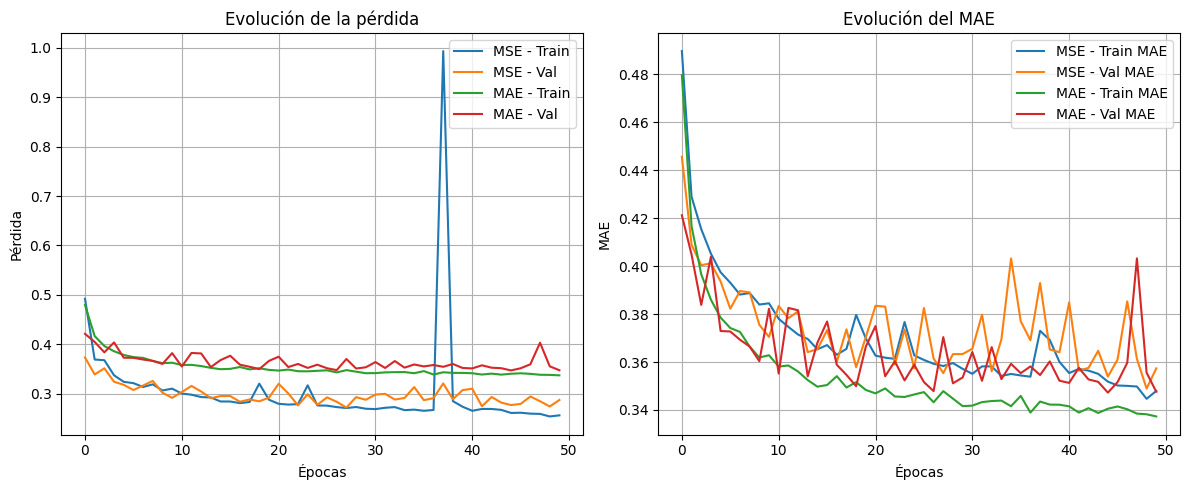

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_mse.history['loss'], label='MSE - Train')
plt.plot(history_mse.history['val_loss'], label='MSE - Val')
plt.plot(history_mae.history['loss'], label='MAE - Train')
plt.plot(history_mae.history['val_loss'], label='MAE - Val')
plt.title('Evolución de la pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_mse.history['mae'], label='MSE - Train MAE')
plt.plot(history_mse.history['val_mae'], label='MSE - Val MAE')
plt.plot(history_mae.history['mae'], label='MAE - Train MAE')
plt.plot(history_mae.history['val_mae'], label='MAE - Val MAE')
plt.title('Evolución del MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. Evaluación final en test set

In [4]:
# Evaluación con distintas métricas
for name, model in [('MSE', model_mse), ('MAE', model_mae)]:
    y_pred = model.predict(X_test).flatten()
    print(f'--- Evaluación con función de pérdida: {name} ---')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
    print(f'R²: {r2_score(y_test, y_pred):.4f}\n')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
--- Evaluación con función de pérdida: MSE ---
MAE: 0.3574
MSE: 0.2874
RMSE: 0.5361
R²: 0.7807

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Evaluación con función de pérdida: MAE ---
MAE: 0.3476
MSE: 0.2893
RMSE: 0.5378
R²: 0.7792

